In [ ]:
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "c2s4-project"
dataset_name = "restaurant_dataset_1"
table_name = "cleaned_restaurant_data_1" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query all data from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_df = query_job.to_dataframe()
restaurant_df.head()

,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories,...,Caters,RestaurantsAttire,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,NoiseLevel,Parking,PriceRangeLabel,total_number_of_checkin
0,nvEFnkeSh3bKkajIIWdHDg,Domino's Pizza,Atco,NJ,39.765040,-74.890892,2.0,7,1,"Restaurants, Italian, Sandwiches, Pizza, Chick...",...,0,0,0,-1,0,0,-1,0,low,5
1,zWDESCEtvhzpi8YRXaukNA,Dunkin',Atco,NJ,39.771831,-74.900027,1.5,18,1,"Food, Coffee & Tea, Donuts, Restaurants",...,0,0,0,-1,0,0,-1,0,low,31
2,ogeBHp2egBL92cTqbPX4Pw,New Atco Diner,Atco,NJ,39.769653,-74.897275,2.5,13,0,"Restaurants, Diners",...,1,0,1,0,0,1,-1,1,low,7
3,10NR8u93XVxTm8XMWUimEg,China Max,Atco,NJ,39.771911,-74.900187,4.0,17,1,"Chinese, Restaurants",...,1,0,0,1,0,1,-1,0,low,5
4,_kyICE-EUT5iExwp0RdARw,Fabios Pizza,Atco,NJ,39.771590,-74.899548,4.0,21,1,"Sandwiches, Italian, Restaurants, Pizza",...,1,0,0,1,1,1,-1,0,low,8


In [ ]:
import pandas as pd

# 映射 'high', 'medium', 'low' 到 2, 1, 0
mapping = {'high': 2, 'medium': 1, 'low': 0}
restaurant_df['LevelNumeric'] = restaurant_df['PriceRangeLabel'].map(mapping)
df1 = restaurant_df.drop(['business_id', 'name', 'city', 'state', 'categories', 'PriceRangeLabel'],
               axis = 1)
df1

,latitude,longitude,stars,review_count,is_open,category_Bars,category_Breakfast_Brunch,category_FastFood,category_Food,category_Nightlife,...,Caters,RestaurantsAttire,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,NoiseLevel,Parking,total_number_of_checkin,LevelNumeric
0,39.765040,-74.890892,2.0,7,1,0,0,0,0,0,...,0,0,0,-1,0,0,-1,0,5,0
1,39.771831,-74.900027,1.5,18,1,0,0,0,1,0,...,0,0,0,-1,0,0,-1,0,31,0
2,39.769653,-74.897275,2.5,13,0,0,0,0,0,0,...,1,0,1,0,0,1,-1,1,7,0
3,39.771911,-74.900187,4.0,17,1,0,0,0,0,0,...,1,0,0,1,0,1,-1,0,5,0
4,39.771590,-74.899548,4.0,21,1,0,0,0,0,0,...,1,0,0,1,1,1,-1,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50846,40.090144,-75.384434,3.5,171,1,1,0,0,0,1,...,1,0,1,0,1,1,-1,1,177,2
50847,40.096547,-75.415664,3.5,20,0,0,0,0,0,0,...,0,0,0,0,1,0,-1,0,14,2
50848,28.250042,-82.720345,3.5,5,0,0,0,0,1,0,...,0,0,1,0,0,0,-1,1,11,2
50849,38.754990,-90.482773,3.5,32,1,1,0,0,0,1,...,0,0,1,0,1,1,-1,1,19,2


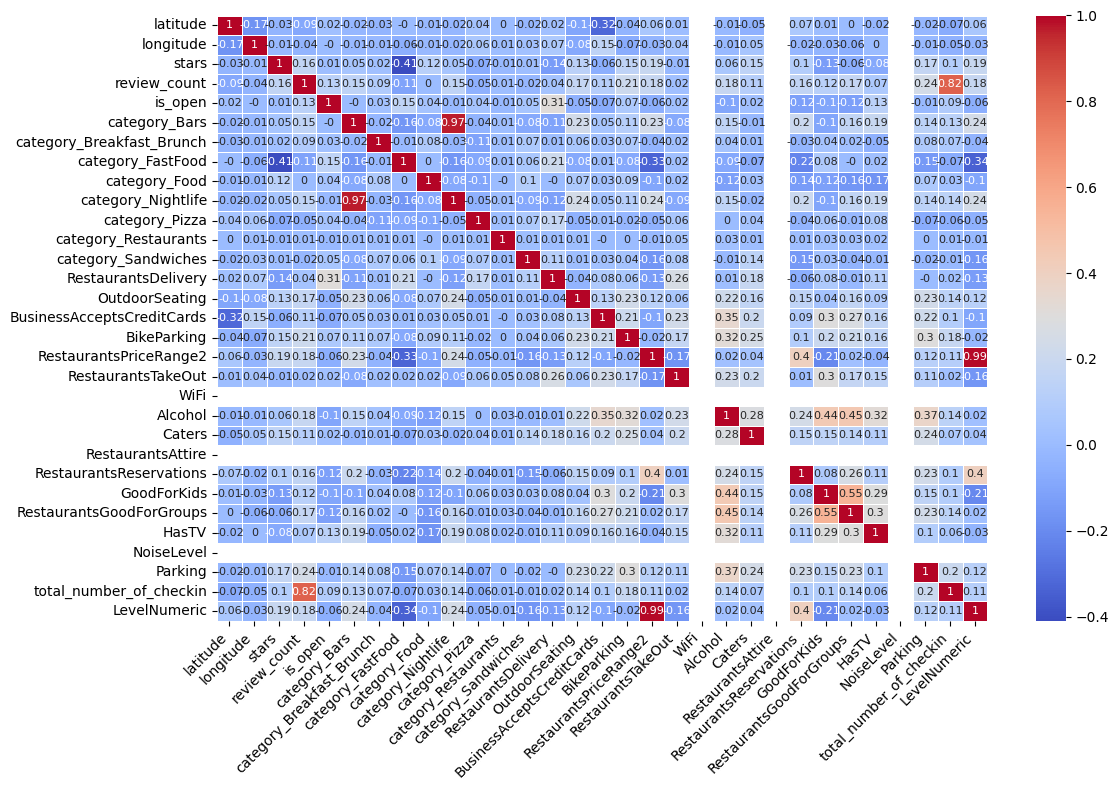

In [ ]:
import matplotlib.pyplot as plt
# Initial target
import seaborn as sns
# create a correlation matrix rounding to one decimal point
plt.figure(figsize=(12, 8))  # 调整图像大小
correlation_matrix = df1.corr().round(2)
# print a correlation heat map
sns.heatmap(
    data=correlation_matrix,
    annot=True,
    annot_kws={"size": 8},  # 控制注释字体大小
    cmap='coolwarm',         # 更改颜色映射方案
    linewidths=0.5,          # 使网格线更细
    linecolor='white'        # 使用白色的网格线
)

plt.xticks(rotation=45, ha='right')  # 标签旋转并对齐
plt.tight_layout()  # 自动调整布局
plt.show()

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "c2s4-project"
dataset_name = "restaurant_dataset_1"
table_name = "checkin_groupby_time_df" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query all data from the table
query = f"""
    SELECT *
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

checkin_df = query_job.to_dataframe()
checkin_df.head()

,business_id,date,year,month,day,hour,checkin_number
0,Ct_g_xmNh1wvpfTD-QLI8Q,2018-01-01 00:05:48+00:00,2018,1,1,0,1
1,2E5fh57OvOQMWwxxEOkN8A,2017-01-01 21:33:21+00:00,2017,1,1,21,1
2,S6q5t-TGc_je8ssh06zTYw,2015-01-01 22:01:40+00:00,2015,1,1,22,1
3,ktM6aYuzqWd-kA8SIWswiQ,2016-01-01 16:57:36+00:00,2016,1,1,16,1
4,ICYYwP4UkgfKdm-2WUeuFA,2016-01-01 16:35:42+00:00,2016,1,1,16,1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


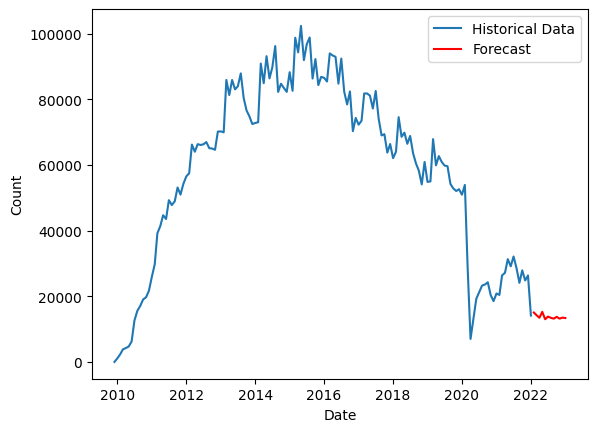

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



checkin_df['Count'] = 1
monthly_counts = checkin_df.groupby(['year', 'month']).count().reset_index()

# 将‘年’‘月’‘日'合并为一列（日期列）
monthly_counts['Date'] = pd.to_datetime(
    monthly_counts[['year', 'month']].assign(Day=1))

# 设置‘Date’作为索引
monthly_counts.set_index('Date', inplace=True)

# 提取‘Count’列作为时间序列数据
ts_data = monthly_counts['Count']

# 创建并训练 ARIMA 模型
model = ARIMA(ts_data, order=(5, 1, 0))
model_fit = model.fit()

# 预测未来12个月的值
forecast = model_fit.forecast(steps=12)

# 可视化结果
plt.plot(ts_data, label='Historical Data')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

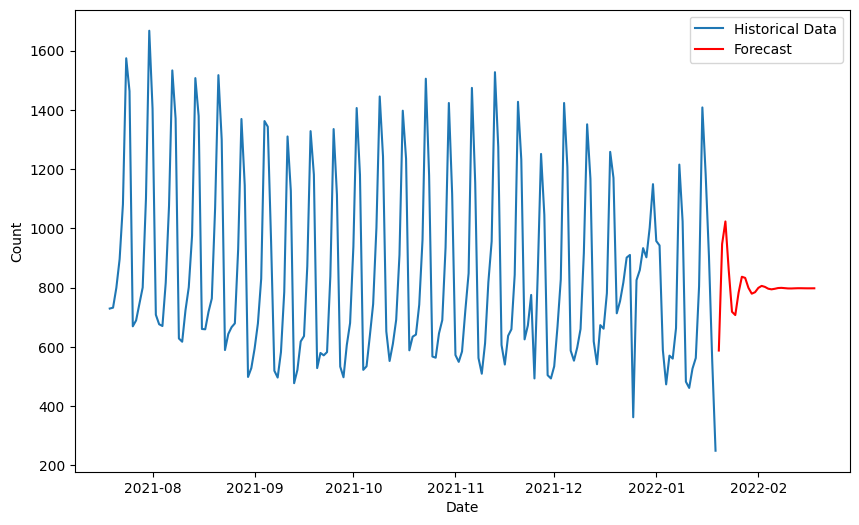

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 假设 checkin_df 是包含 'year', 'month', 'day' 列的 DataFrame
checkin_df['Count'] = 1
daily_counts = checkin_df.groupby(['year', 'month', 'day']).count().reset_index()

# 将‘年’‘月’‘日’合并为一列（日期列）
daily_counts['Date'] = pd.to_datetime(daily_counts[['year', 'month', 'day']])

# 设置‘Date’作为索引
daily_counts.set_index('Date', inplace=True)

# 提取‘Count’列作为时间序列数据
ts_data = daily_counts['Count']

# 创建并训练 ARIMA 模型
model = ARIMA(ts_data, order=(3, 1, 2))
model_fit = model.fit()

# 获取当前时间序列的最后一个日期
last_date = ts_data.index[-1]

# 预测未来30天的日期索引
forecast_dates = pd.date_range(last_date + pd.DateOffset(days=1), periods=30, freq='D')

# 使用模型预测未来30天的值
forecast = model_fit.forecast(steps=30)

# 获取最后12个月的历史数据
last_12_months = ts_data[ts_data.index >= last_date - pd.DateOffset(months=6)]

# 可视化结果，仅显示最后12个月的历史数据和预测结果
plt.figure(figsize=(10, 6))
plt.plot(last_12_months, label='Historical Data')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

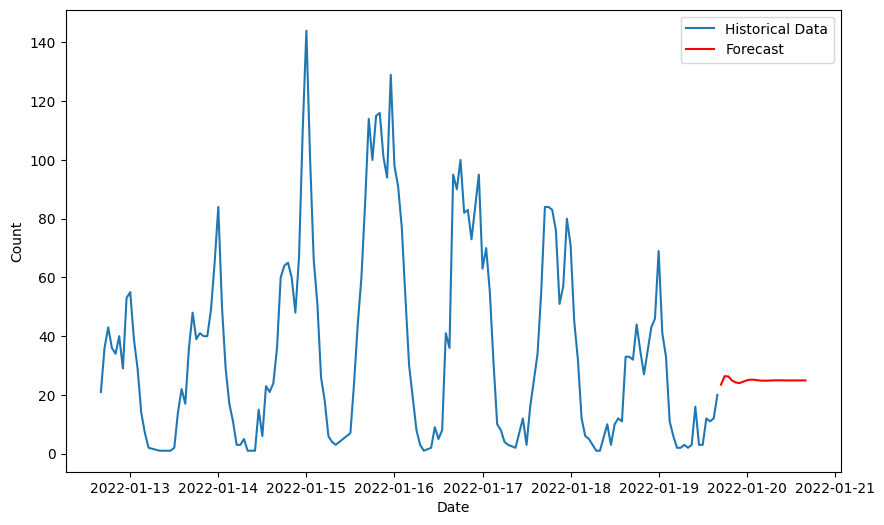

In [ ]:
# 对相同小时进行计数
checkin_df['Count'] = 1
hourly_counts = checkin_df.groupby(['year', 'month', 'day', 'hour']).count().reset_index()

# 将‘年’‘月’‘日’‘小时’合并为完整的时间戳
hourly_counts['Date'] = pd.to_datetime(hourly_counts[['year', 'month', 'day', 'hour']])

# 设置‘Date’作为索引
hourly_counts.set_index('Date', inplace=True)

# 提取‘Count’列作为时间序列数据
ts_data = hourly_counts['Count']

# 创建并训练 ARIMA 模型
model = ARIMA(ts_data, order=(5, 1, 0))  # 你可以调整这里的 order 参数
model_fit = model.fit()

# 获取当前时间序列的最后一个日期
last_date = ts_data.index[-1]

# 预测未来24小时的索引
forecast_dates = pd.date_range(last_date + pd.DateOffset(hours=1), periods=24, freq='H')

# 使用模型预测未来24小时的值
forecast = model_fit.forecast(steps=24)

# 获取最后3天的历史数据
last_3_days = ts_data[ts_data.index >= last_date - pd.DateOffset(days=7)]

# 可视化结果，只显示最后3天的历史数据和预测结果
plt.figure(figsize=(10, 6))
plt.plot(last_3_days, label='Historical Data')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()